# LAB8
## Running SPAdes
- Why do we expect short reads to produce a more fragmented assembly than long reads? 
    - The assembly produced by using short reads would be more fragmented because more contigs are required. The assembly would be more broken up and fragmented. Longer reads, on the other hand, would be more coherent and are unlikely to result in a broken up assembly.  
    
- Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina?
    - PacBio(single molecule sequencing) tends to have a higher error rate than short reads because the reads are longer, which makes the process of examining the data inefficient. Consequently, Pacbio is expected to be less accurate than illumina. One way to compensate for the high error rate is to get multiple reads from the same template.  

The SPAdes command is shown below:

    spades.py -1 /data/lab8/illumina_reads_R1.fastq -2 /data/lab8/illumina_reads_R2.fastq --pacbio /data/lab8/pacbio_reads.fastq -t 1 -o /home/be131-05/LAB8/illumina_concatenated

# LAB9
## Generate assembly statistics
Running the assembly-stats program:

    be131-05@meowth:~/LAB8/illumina_concatenated$ assembly-stats contigs.fasta scaffolds.fasta
    
    stats for contigs.fasta
    sum = 6678635, n = 176, ave = 37946.79, largest = 414008
    N50 = 234690, n = 11
    N60 = 202142, n = 14
    N70 = 154232, n = 18
    N80 = 103367, n = 23
    N90 = 81286, n = 30
    N100 = 128, n = 176
    N_count = 0
    Gaps = 0
    -------------------------------------------------------------------------------
    stats for scaffolds.fasta
    sum = 6678655, n = 174, ave = 38383.07, largest = 414008
    N50 = 234690, n = 11
    N60 = 202142, n = 14
    N70 = 154232, n = 18
    N80 = 103367, n = 23
    N90 = 81821, n = 30
    N100 = 128, n = 174
    N_count = 20
    Gaps = 2

The results are summarized in the following table. 

|  -              | Contigs   | Scaffolds   |
|:---------------:|:---------:|:-----------:|
| Total Length    |  6678635  |   6678655   |
| Number          |  176      |   174       |
| N50             |   234690  |   234690    |

- Why is N50 is useful statistic to calculate? Why not just list the mean or median contig length? In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?
    - N50 describes the completeness of the genome assembly and shows the distribution of the contig lengths. The N50 is defined as the minimum contig length needed to cover 50% of the genome. It means, half of the genome sequence is in contigs larger than or equal the N50 contig size. It is useful in genomic statistic and is more meaningful than mean/median because it has greater weight on longer contigs. In reality, some contigs might be too short and thus are not very useful since it's not desirable to fill up an assembly with many overly short sequences. Researchers sometimes choose to exclude the overly short contigs from an assembly. In this case, using a mean or median to describe an assembly would be inaccurate and misleading.  
    - The total length of scaffolds are approximately equal to contigs, which means that the assembler has no additional information that could be used to determine the order and orientation of contigs in a scaffold.

## Extra credit
Extract the coverage from each FASTA header and plot a histogram of coverage for all contigs in your assembly.

In [15]:
# the coverage at the fifth position in the first line of fasta
from Bio import SeqIO
import matplotlib.pyplot as plt 
import numpy as np
records = SeqIO.parse('contigs.fasta','fasta')
coverages = []
for record in records:
    coverage = float(record.id.split('_')[5])
    coverages.append(coverage)
print(coverages)
print()
print('The mean coverage of contigs is,',np.mean(coverages))

[7.740928, 10.006665, 7.539874, 9.114046, 9.241629, 8.918606, 8.126053, 8.706677, 7.455302, 7.139043, 8.64251, 7.910328, 6.973549, 8.264545, 7.418715, 8.846256, 8.57711, 9.584186, 8.773953, 7.418265, 7.113839, 8.039997, 10.081286, 7.785886, 7.854012, 8.146401, 7.136158, 8.555536, 7.722379, 9.311795, 8.238385, 9.074883, 7.372789, 7.420957, 6.46957, 8.116505, 7.61281, 7.993083, 7.424264, 7.895898, 7.608171, 7.601905, 7.314205, 8.45544, 14.119172, 10.363252, 5.239566, 7.030905, 5.388827, 0.708005, 9.625, 6.539275, 0.427495, 4.630975, 0.934599, 0.812236, 0.803797, 6.890063, 0.900634, 0.898649, 8.990244, 0.98005, 0.97878, 0.929919, 0.937669, 0.834688, 0.9375, 0.923706, 0.937158, 0.958217, 0.958217, 0.944134, 1.002801, 0.72191, 0.974576, 0.977337, 0.864023, 0.982906, 0.985714, 0.933526, 0.742775, 0.94186, 1.008772, 0.918129, 1.008798, 0.692082, 0.970588, 1.02071, 0.946588, 0.952381, 1.026866, 0.855856, 1.638554, 1.039275, 1.021148, 0.740181, 1.045455, 0.936364, 0.681818, 0.772036, 0.929664, 

We can see that the last two coverages are much larger compared to the rest of the covergages, we exlude these two when plotting the histogram.

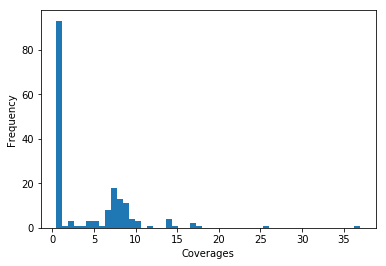

In [16]:
plt.hist(coverages[:-2],50)
plt.xlabel('Coverages')
plt.ylabel('Frequency')
plt.show()

- Is coverage uniformly distributed? Does it look Gaussian? Is it bimodal or trimodal?
    - The coverage is not a uniform distribution or a Gaussian distribution. It is a bimodal distribution with one peak at 1 and a second peak at ~7. 
- What explains the presence of contigs with coverage an integer multiple of the mean coverage?
    - The mean coverage is determined to be 14. We do not observe coverages that are multiple of the mean coverage here. If we do, then it means the regions in genome are duplicated. 

## Identify the taxon from which your genome originated
To identify your genome, you must

1. scan over the entire genome to locate copies of the 16S ribosomal RNA gene, 
2. extract the 16S rRNA genes from your assembly, and 
3. compare these genes to a database of known 16S rRNA genes

- First, run the rna_hmm3.py program on your assembled contigs to locate rRNA genes. 
     
         be131-05@meowth:~/LAB8$ rna_hmm3.py -i contigs.fasta -o contigs.gff
    
- The output gff content is included here. Delete all lines within other than those containing 16S_rRNA genes.    
    
        ##seq_name	method	feature	start	end	evalue	strand	frame	attribute
        NODE_23_length_103367_cov_10.081286	rna_hmm3	rRNA	35531	37075	0	+	NA	16S_rRNA
        NODE_18_length_154232_cov_9.584186	rna_hmm3	rRNA	124542	126086	0	+	NA	16S_rRNA
        NODE_5_length_327223_cov_9.241629	rna_hmm3	rRNA	46286	47830	0	+	NA	16S_rRNA
        NODE_6_length_298784_cov_8.918606	rna_hmm3	rRNA	13926	15470	0	+	NA	16S_rRNA
        NODE_4_length_332509_cov_9.114046	rna_hmm3	rRNA	137012	138556	0	-	NA	16S_rRNA
        NODE_2_length_378948_cov_10.006665	rna_hmm3	rRNA	348500	350044	0	+	NA	16S_rRNA
    
    
- Next, use bedtools getfasta to extract nucleic acid sequences of the 16S rRNA genes from
your assembly. You will need to specify the path to contigs.fasta with -fi and the path to the
GFF file you obtained above, with -bed. The output will be in FASTA format.

        be131-05@meowth:~/LAB8$ bedtools getfasta -fi contigs.fasta -bed contigs.gff > 16S_rRNA.fasta

- Using the Ribosomal Database Project’s SeqMatch tool, the sequences in the output gff files are examined. One of the results is included here. 

        ##seq_name	
        NODE_23_length_103367_cov_10.081286: 
        
        rootrank Root (20) (match sequences) 
        domain Bacteria (20) 
          phylum "Proteobacteria" (20) 
             class Gammaproteobacteria (20) 
                order Pseudomonadales (20) 
                   family Pseudomonadaceae (20) 
                      genus Pseudomonas (20) 
                        S000407513     not_calculated 0.984 1186  Pseudomonas sp. MFY32; AY331343
                        S000891983     not_calculated 0.984 1296  Pseudomonas sp. II-39; DQ977710
                        S001098708     not_calculated 0.985 1234  Pseudomonas lini; REG21; EU647700
                        S001098710     not_calculated 0.986 1243  Pseudomonas mediterranea; REG60; EU647702
                        S001795896     not_calculated 0.984 1278  Pseudomonas sp. Lc10-2; GU244354
                        S002958599     not_calculated 0.989 1337  Pseudomonas fluorescens; hp13; JN637318
                        S003278370     not_calculated 1.000 1270  Pseudomonas frederiksbergensis; rp3; JF906070
                        S003278371     not_calculated 1.000 1270  Pseudomonas frederiksbergensis; rp13; JF906071
                        S003278373     not_calculated 0.984 1269  Pseudomonas mandelii; rp23; JF906073
                        S003290716     not_calculated 0.990 1251  Pseudomonas arsenicoxydans; MaBP1; JQ317810
                        S003290717     not_calculated 0.984 1250  Pseudomonas mandelii; McBPA4; JQ317811
                        S003290718     not_calculated 0.984 1250  Pseudomonas mandelii; McBRA2; JQ317812
                        S003302217     not_calculated 0.989 1303  Pseudomonas lini; 40; JX122159
                        S003616324     not_calculated 0.989 1236  Pseudomonas mandelii; BJC15-C35; JX469391
                        S003616553     not_calculated 0.989 1228  Pseudomonas mandelii; BJC16-C1; JX483782
                        S003745408     not_calculated 0.986 1258  Pseudomonas mandelii; Tibetlhz-57; JX827234
                        S003789558     not_calculated 0.985 1298  Pseudomonas sp. Aza24; JQ977627
                        S004484092     not_calculated 0.984 1241  Pseudomonas mandelii; Ge03; KR088370
                        S004493454     not_calculated 0.987 1306  Pseudomonas fluorescens; SE02(2); KT239467
                        S004534171     not_calculated 0.984 1246  bacterium C0074; KP177382

This tool is used for all 16S rRNA sequences that we obtained previously. Although they map to different species, they all match to a common genus: Pseudomonas. This conclusion is reached since the top 20 matches of each input match to an identical genus. 
        

## Genome annotation

Upload the genome to two remote annotation services that will perform
the annotation automatically: RAST and BASys.

- Annotation from BASYs: https://www.basys.ca/server3/basys/cache/3f767cbac6f990dc1d56ab58e2f7686c/maps/index.html
- Annotation from RAST: http://rast.nmpdr.org/seedviewer.cgi?page=Organism&organism=6666666.379375

## Research and write-up

- CRISPR-Cas9 is so hot right now. Does your genome have a CRISPR system? Can you determine where the spacer sequences originated from?


    - CRISPR-Cas9: Clustered regularly interspaced short palindromic repeats (CRISPR) and their associated genes (cas) are essential components of an adaptive immune system that protects bacteria and archaea from viral infection. CRISPR systems contain two components: a guide RNA (gRNA or sgRNA) and a CRISPR-associated endonuclease (Cas protein). The gRNA is a short synthetic RNA composed of a scaffold sequence necessary for Cas-binding and a user-defined ∼20 nucleotide spacer that defines the genomic target to be modified. Thus, one can change the genomic target of the Cas protein by simply changing the target sequence present in the gRNA. Reference: *https://www.addgene.org/crispr/guide/*
    
    
    - From this research paper (*https://www.nature.com/articles/cr20176*), we can see that Pseudomonas aeruginosa(PA) has a CRISPR system. The spacer sequences in the CRISPR system are mostly complementary to sequences located on its bacteriophage genome (the virus that  parasitizes PA). Some spacer sequences do contain mismatches. Mismatches between PA spacer sequence and corresponding sequence on viral genome was found to prevent the formation of biofilm by causing DNA damage and cell death. Spacer sequences are genetics remnants of previous invaders, which allow PA to detect and destroy bacteriophage if they return.  
    



